Group 4

Directions: 
Use the normal distribution as a candidate distribution to generate samples from a probability
distribution composed of the sum of three other normal distributions with means µ1 = −1,
µ2 = 0 and µ3 = 1 and standard deviations σ1 = σ2 = σ3 = 0.5.

In [32]:
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
colors = sns.color_palette("Paired")

## Rejection sampling functions for algorithms 6.3.1, 6.3.3

In [72]:
def madeUpDist(x):
    return (norm.pdf(x,0, 0.5) + norm.pdf(x, -1, 0.5) + norm.pdf(x,1,0.5))/3


# 6.3.1 Version

def reject(c,L):
    ''' parameters:
    c - scaling parameter
    L - length of sequence
    '''
    i=0
    numCandidates = 0
    
    y=np.zeros(L)
    
    while i<L:
        U=np.random.uniform()
        x=np.random.normal()
        
        # Accept candidate? 
        if U<= madeUpDist(x)/(c*norm.pdf(x)):
            y[i]=x
            i=i+1
        numCandidates +=1
    return y, numCandidates


# 6.3.3 Version

def reject2(c,L):
    '''
        c - scaling parameter starting value
        L - length of sequence
    '''
    
    y = np.zeros(L)
                
    i = 0   
    numCandidates = 0
    
    while i < L:
        U = np.random.uniform()
        x = np.random.normal()
        fg = madeUpDist(x)/norm.pdf(x)
        if U < fg/c:
            y[i] = x
            i += 1
            c = max(c,fg)
        numCandidates += 1
        
    return y,numCandidates,c

# Comparing candidate and target distributions

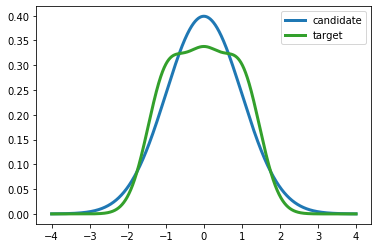

In [34]:

xNodes = np.linspace(-4,4,10000)

plt.plot(xNodes,norm.pdf(xNodes),color = colors[1],label="candidate",linewidth = lineWidth)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="target",linewidth = lineWidth)

plt.legend()

## Generating data

In [16]:
# 6.3.1, too large c
numTrials = 3
avgC1 = 0
for i in range(numTrials):
    y1,numC1=reject(4,5000)
    avgC1 += numC1

avgC1 = avgC1/numTrials
print("The average number of candidates needed for algorithm 6.3.1, c = 4 is " + str(avgC1))

avgC2 = 0
for i in range(numTrials):
    y2,numC2,=reject(10,5000)
    avgC2 += numC2

avgC2 = avgC2/numTrials; 
print("The average number of candidates needed for algorithm 6.3.3, c = 10 is " + str(avgC2))

The average number of candidates needed for algorithm 6.3.1, c = 4 is 19919.0
The average number of candidates needed for algorithm 6.3.3, c = 10 is 50402.666666666664


In [46]:
# 6.3.3 to pick a good c value, then 6.3.1
y22, numC22, cGood = reject2(1,5000)

print("In one trial, c converged to " + str(cGood))
print("This convergence required " + str(numC22) + " candidates.")

avgC12 = 0
for i in range(numTrials):
    y12,numC12=reject(cGood,5000)
    avgC12 += numC12

avgC12 = avgC12/numTrials
print("The average number of candidates needed for algorithm 6.3.1, c = " + str(c) + " is " + str(avgC1))

In one trial, c converged to 1.3501261732262495
This convergence required 6763candidates.
The average number of candidates needed for algorithm 6.3.1, c = 1.3501261726943055 is 19919.0


## Plotting results

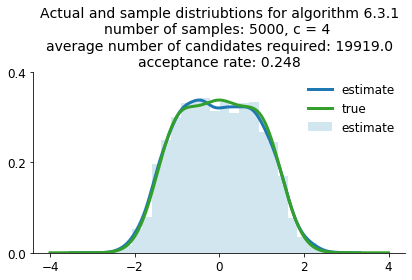

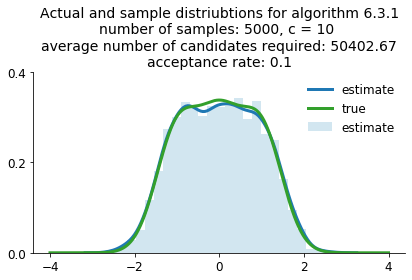

In [64]:
# Plot for algorithm 6.3.1, too large c
lineWidth = 3; fontSize = 12

plt.figure()
sns.kdeplot(y1,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(y1,density = True,bins = 25,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "Actual and sample distriubtions for algorithm 6.3.1" +"\n" \
+ "number of samples: 5000, c = 4 " + "\n" \
+ "average number of candidates required: " + str(avgC1)+"\n"\
+ "acceptance rate: " + str(round(5000/numC1,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()


plt.figure()
sns.kdeplot(y2,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(y2,density = True,bins = 25,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "Actual and sample distriubtions for algorithm 6.3.1" +"\n" \
+ "number of samples: 5000, c = 10 " + "\n" \
+ "average number of candidates required: " + str(round(avgC2,2))+"\n"\
+ "acceptance rate: " + str(round(5000/numC2,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()

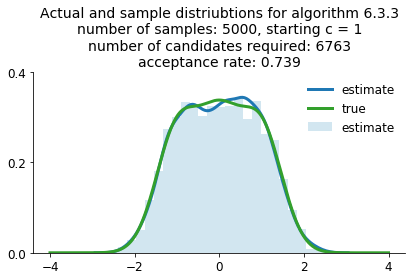

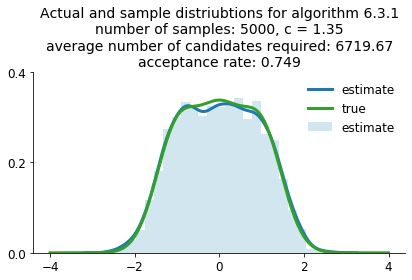

In [65]:
# Plot for algorithm 6.3.3, then 6.3.1
lineWidth = 3; fontSize = 12

sns.kdeplot(y22,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(y2,density = True,bins = 25,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "Actual and sample distriubtions for algorithm 6.3.3" +"\n" \
+ "number of samples: 5000, starting c = 1" + "\n"\
+ "number of candidates required: " + str(numC22)+"\n"\
+ "acceptance rate: " + str(round(5000/numC22,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()

plt.figure()
sns.kdeplot(y2,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(y2,density = True,bins = 25,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "Actual and sample distriubtions for algorithm 6.3.1" +"\n" \
+ "number of samples: 5000, c = " + str(round(cGood,3))+ "\n"\
+ "average number of candidates required: " + str(round(avgC12,2)) +"\n"\
+ "acceptance rate: " + str(round(5000/numC12,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()

In [67]:
y100,numC100 = reject(cGood,100)
y1000,numC1000=reject(cGood,1000)
y10000,numC10000 = reject(cGood,10000)
y25000,numC25000 = reject(cGood,25000)

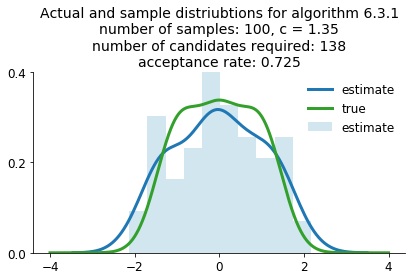

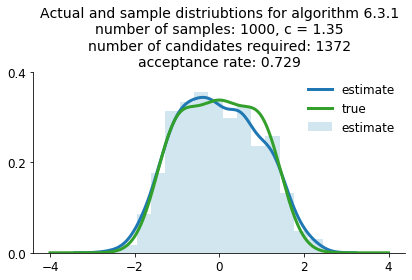

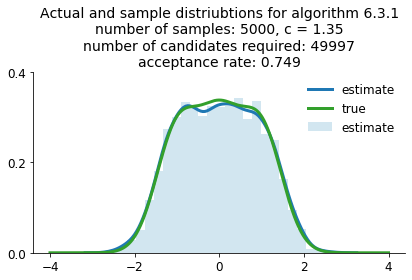

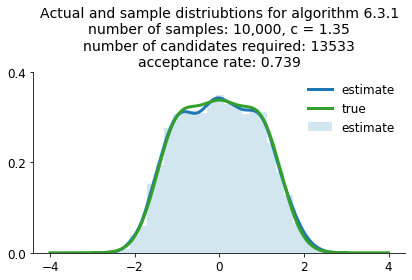

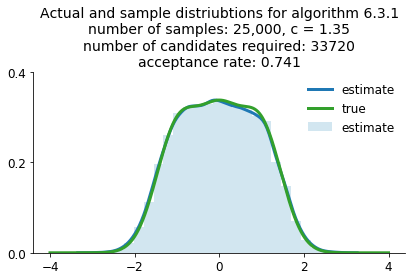

In [69]:
plt.figure()
sns.kdeplot(y100,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(y100,density = True,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "Actual and sample distriubtions for algorithm 6.3.1" +"\n" \
+ "number of samples: 100, c = " + str(round(cGood,3))+ "\n" \
+ "number of candidates required: " + str(numC100) +"\n"\
+ "acceptance rate: " + str(round(100/numC100,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()

plt.figure()
sns.kdeplot(y1000,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(y1000,density = True,bins = 15,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "Actual and sample distriubtions for algorithm 6.3.1" +"\n" \
+ "number of samples: 1000, c = " + str(round(cGood,3))+ "\n"\
+ "number of candidates required: " + str(numC1000) + "\n" \
+ "acceptance rate: " + str(round(1000/numC1000,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()

plt.figure()
sns.kdeplot(y2,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(y2,density = True,bins = 25,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "Actual and sample distriubtions for algorithm 6.3.1" +"\n" \
+ "number of samples: 5000, c = " + str(round(cGood,3))+ "\n"\
+ "number of candidates required: " + str(numC2) +"\n"\
+ "acceptance rate: " + str(round(5000/numC12,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()

plt.figure()
sns.kdeplot(y10000,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(y10000,density = True,bins = 25,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "Actual and sample distriubtions for algorithm 6.3.1" +"\n" \
+ "number of samples: 10,000, c = " + str(round(cGood,3))+ "\n" \
+ "number of candidates required: " + str(numC10000) +"\n"\
+ "acceptance rate: " + str(round(10000/numC10000,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()

plt.figure()
sns.kdeplot(y25000,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(y25000,density = True,bins = 25,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "Actual and sample distriubtions for algorithm 6.3.1" +"\n" \
+ "number of samples: 25,000, c = " + str(round(cGood,3))+ "\n"\
+ "number of candidates required: " + str(numC25000) +"\n" \
+ "acceptance rate: " + str(round(25000/numC25000,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()

## Two Dimensions

In [136]:

# 6.3.1 , 2 dimensions

# Same U for both (1 U)
def reject2D(c,L):
    ''' parameters:
    c - scaling parameter
    L - length of sequence
    '''
    i=0
    numCandidates = 0
    
    y=np.zeros(L)
    x = np.zeros(L)
    
    while i<L:
        U=np.random.uniform()
        xCand=np.random.normal()
        yCand = np.random.normal()
        
        # Accept candidate? 
        if U<= madeUpDist(xCand)/(c*norm.pdf(xCand)):
            if U <= madeUpDist(yCand)/(c*norm.pdf(yCand)):
                y[i]=yCand; x[i] = xCand
                i=i+1
        numCandidates +=1
    return x,y, numCandidates


# Different U for each axis (2 U)
def reject2Db(c,L):
    ''' parameters:
    c - scaling parameter
    L - length of sequence
    '''
    i=0
    numCandidates = 0
    
    y=np.zeros(L)
    x = np.zeros(L)
    
    while i<L:
        Ux=np.random.uniform()
        xCand=np.random.normal()
        Uy = np.random.uniform()
        yCand = np.random.normal()
        
        # Accept candidate? 
        if Ux<= madeUpDist(xCand)/(c*norm.pdf(xCand)):
            if Uy <= madeUpDist(yCand)/(c*norm.pdf(yCand)):
                y[i]=yCand; x[i] = xCand
                i=i+1
        numCandidates +=1
    return x,y, numCandidates

## 5000 samples

In [154]:
# 6.3.1, 2D
numTrials = 3
avgC = 0
for i in range(numTrials):
    x,y,numC=reject2D(cGood,5000)
    avgC += numC

avgC = avgC/numTrials
print("The average number of candidates needed for algorithm 6.3.1, 1U is " + str(avgC))

avgCb = 0
for i in range(numTrials):
    xb,yb,numCb,=reject2Db(cGood,5000)
    avgCb += numCb

avgCb = avgCb/numTrials; 
print("The average number of candidates needed for algorithm 6.3.1, 2U is " + str(avgCb))



The average number of candidates needed for algorithm 6.3.1, 1U is 7679.666666666667
The average number of candidates needed for algorithm 6.3.1, 2U is 9117.666666666666


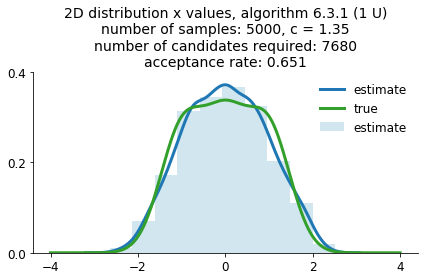

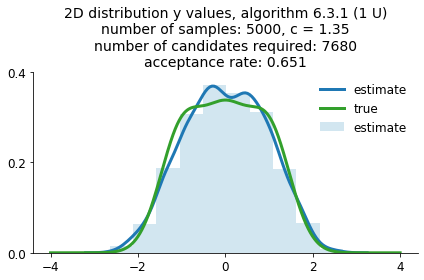

In [155]:
# Plotting 2d, 1U version, 5000 samples

plt.figure()
sns.kdeplot(x,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(x,density = True,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "2D distribution x values, algorithm 6.3.1 (1 U)" +"\n" \
+ "number of samples: 5000, c = " + str(round(cGood,3))+ "\n" \
+ "number of candidates required: " + str(round(avgC)) +"\n"\
+ "acceptance rate: " + str(round(5000/avgC,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()

plt.figure()
sns.kdeplot(y,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(y,density = True,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "2D distribution y values, algorithm 6.3.1 (1 U)" +"\n" \
+ "number of samples: 5000, c = " + str(round(cGood,3))+ "\n" \
+ "number of candidates required: " + str(round(avgC)) +"\n"\
+ "acceptance rate: " + str(round(5000/avgC,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()

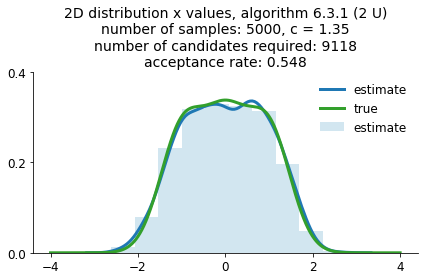

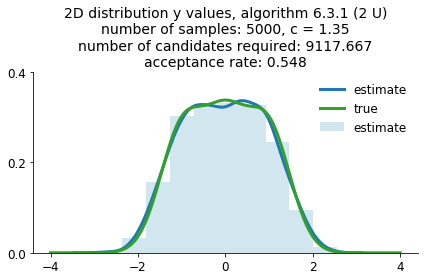

In [156]:
# 6.3.1 2D, 2U version 5000 samples

plt.figure()
sns.kdeplot(xb,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(xb,density = True,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "2D distribution x values, algorithm 6.3.1 (2 U)" +"\n" \
+ "number of samples: 5000, c = " + str(round(cGood,3))+ "\n" \
+ "number of candidates required: " + str(round(avgCb)) +"\n"\
+ "acceptance rate: " + str(round(5000/avgCb,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()

plt.figure()
sns.kdeplot(yb,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(yb,density = True,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "2D distribution y values, algorithm 6.3.1 (2 U)" +"\n" \
+ "number of samples: 5000, c = " + str(round(cGood,3))+ "\n" \
+ "number of candidates required: " + str(round(avgCb,3)) +"\n"\
+ "acceptance rate: " + str(round(5000/avgCb,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()

# 1000 Samples

In [157]:
# 6.3.1, 2D, 1000 
numTrials = 3
avgC = 0
for i in range(numTrials):
    x,y,numC=reject2D(cGood,1000)
    avgC += numC

avgC = avgC/numTrials
print("The average number of candidates needed for algorithm 6.3.1, 1U is " + str(avgC))

avgCb = 0
for i in range(numTrials):
    xb,yb,numCb,=reject2Db(cGood,1000)
    avgCb += numCb

avgCb = avgCb/numTrials; 
print("The average number of candidates needed for algorithm 6.3.1, 2U is " + str(avgCb))



The average number of candidates needed for algorithm 6.3.1, 1U is 1518.6666666666667
The average number of candidates needed for algorithm 6.3.1, 2U is 1822.6666666666667


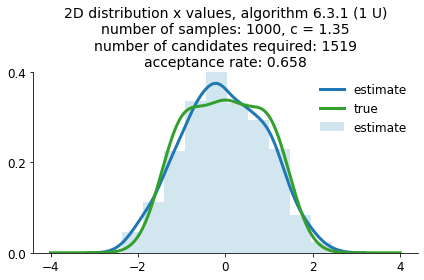

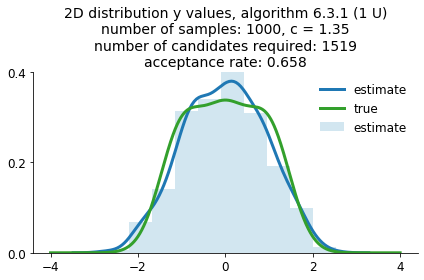

In [158]:
# Plotting 2d, 1U version, 1000 samples

plt.figure()
sns.kdeplot(x,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(x,density = True,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "2D distribution x values, algorithm 6.3.1 (1 U)" +"\n" \
+ "number of samples: 1000, c = " + str(round(cGood,3))+ "\n" \
+ "number of candidates required: " + str(round(avgC)) +"\n"\
+ "acceptance rate: " + str(round(1000/avgC,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()

plt.figure()
sns.kdeplot(y,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(y,density = True,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "2D distribution y values, algorithm 6.3.1 (1 U)" +"\n" \
+ "number of samples: 1000, c = " + str(round(cGood,3))+ "\n" \
+ "number of candidates required: " + str(round(avgC)) +"\n"\
+ "acceptance rate: " + str(round(1000/avgC,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()

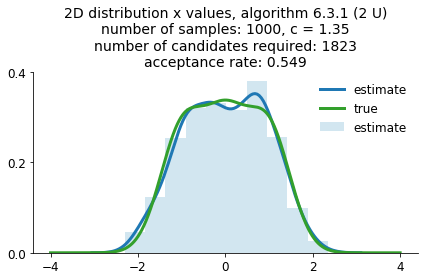

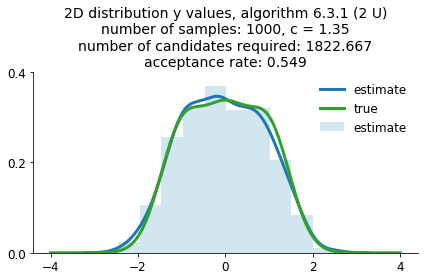

In [159]:
# 6.3.1 2D, 2U version 1000 samples

plt.figure()
sns.kdeplot(xb,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(xb,density = True,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "2D distribution x values, algorithm 6.3.1 (2 U)" +"\n" \
+ "number of samples: 1000, c = " + str(round(cGood,3))+ "\n" \
+ "number of candidates required: " + str(round(avgCb)) +"\n"\
+ "acceptance rate: " + str(round(1000/avgCb,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()

plt.figure()
sns.kdeplot(yb,label="estimate", color = colors[1],linewidth = lineWidth)
plt.hist(yb,density = True,color = colors[0],label="estimate",alpha = .5)
plt.plot(xNodes,madeUpDist(xNodes),color = colors[3],label="true",linewidth = lineWidth)
plt.legend(frameon = False,fontsize = fontSize)

titleStr = "2D distribution y values, algorithm 6.3.1 (2 U)" +"\n" \
+ "number of samples: 1000, c = " + str(round(cGood,3))+ "\n" \
+ "number of candidates required: " + str(round(avgCb,3)) +"\n"\
+ "acceptance rate: " + str(round(1000/avgCb,3))
plt.title(titleStr,fontsize = fontSize + 2)
plt.xticks(ticks = [-4,-2,0,2,4],fontsize = fontSize)
plt.yticks(ticks = [0,.2,.4],fontsize = fontSize)
plt.ylim(0,.4)
plt.tight_layout()
sns.despine()